In [3]:
#Installing libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime
import scipy.stats as stats

In [4]:
# Reading data:
customers = pd.read_csv("olist_customers_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")

# ANALYSIS OF THE CUSTOMERS DATABASE

In [5]:
print("Customers database contains", customers.shape[0], "rows and", customers.shape[1], "columns.")
customers.head()

Customers database contains 99441 rows and 5 columns.


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [6]:
#Number of unique customers

cust = customers["customer_unique_id"].nunique()

print("Number of unique customers:",cust)

Number of unique customers: 96096


In [7]:
cities = customers["customer_city"].nunique()
c1 = customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the database.")

There are 4119 unique cities in the database.


In [8]:
print("The TOP 10 cities are:")
c2 = c1.head(10)
print(c2)

The TOP 10 cities are:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64


In [9]:
print("\nTOP 10 cities covers", round(c2.sum()/customers.shape[0]*100,1),"percent of all the orders.")


TOP 10 cities covers 35.2 percent of all the orders.


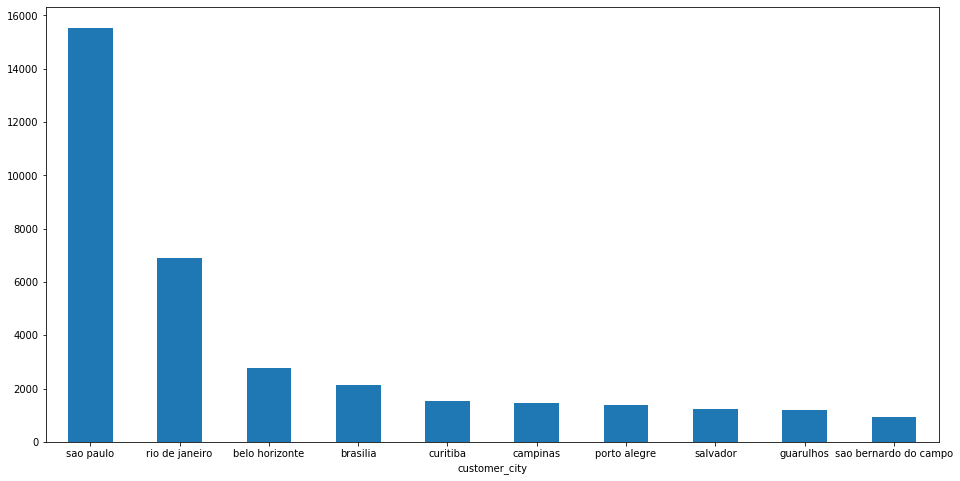

In [10]:
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

The most customers come from Sao Paulo. This is the biggest city in Brazil as well as in the entire South America

# ANALYSIS OF THE ORDERS DATABASE

In [11]:
payments["payment_value"].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [12]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

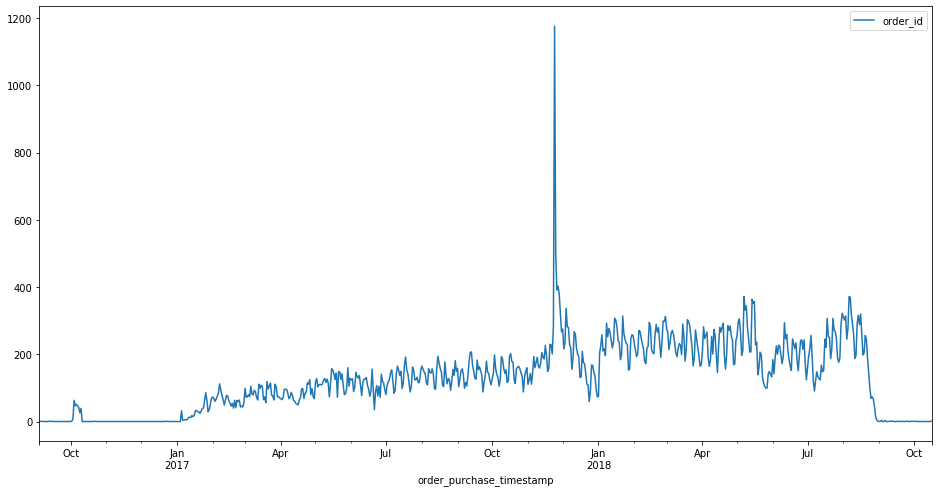

In [13]:
orders_mod = orders.copy()
orders_mod["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')
counts = orders_mod.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
counts.plot(y = "order_id", use_index=True, ax=ax)

From the graph above we can see that there is a peak in the region of Christmas.

Text(0, 0.5, '')

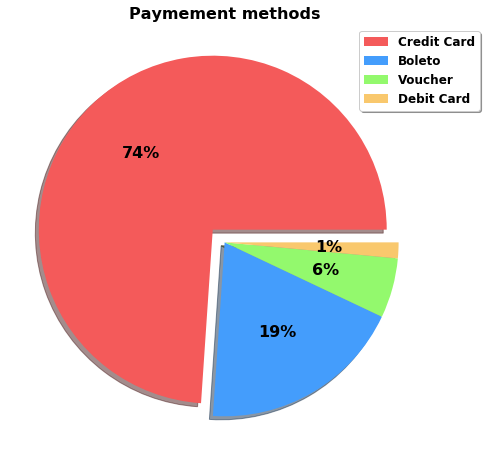

In [14]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0, 0, 0)
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
legend = ["Credit Card", "Boleto", "Voucher", "Debit Card"]

p = payments["payment_type"][payments["payment_type"] != "not_defined"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, explode=explode, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Paymement methods", fontweight='bold', size=16)
plt.ylabel("")

# ANALYSIS OF DELIVERY TIMES

In [15]:
# Data preparation
def convert(db,columns_list):
    for column in columns_list:
        db[column] = pd.to_datetime(db[column])

orders_mod = orders.copy()
cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

convert(orders_mod,cols)
orders_mod['delivery_time'] = orders_mod['order_delivered_carrier_date'] - orders_mod['order_purchase_timestamp']
q95 = orders_mod['delivery_time'].quantile(.95)

delivered = orders_mod[orders_mod["order_status"]=="delivered"]
delivered.set_index(delivered['order_purchase_timestamp'], inplace = True)

delivered = delivered.sort_index()
delivered["dts"] = delivered["delivery_time"].dt.total_seconds()
delivered = delivered["dts"].resample("D").mean()
delivered = round(delivered/86400,2)
delivered = delivered[delivered<8]
print(delivered.describe())
m_del = delivered.mean()

count    603.000000
mean       3.252405
std        0.855460
min        0.230000
25%        2.655000
50%        3.170000
75%        3.770000
max        6.480000
Name: dts, dtype: float64


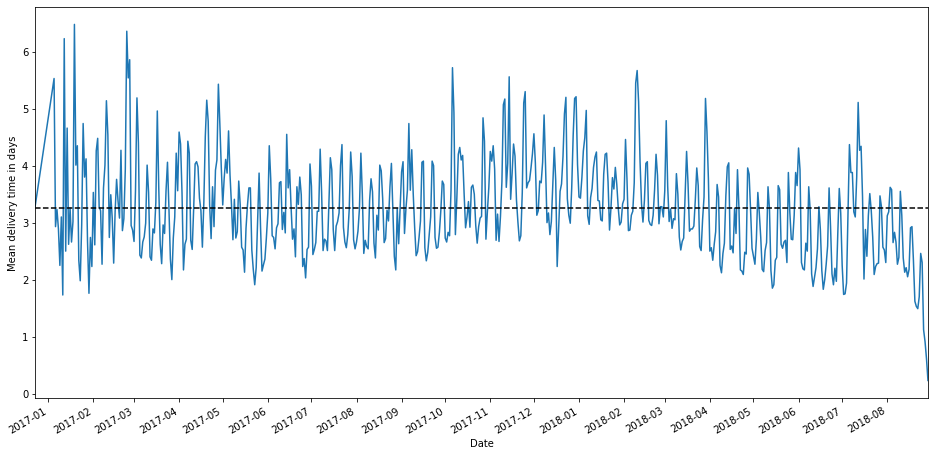

In [16]:
ax = delivered.plot(figsize=(16,8))
plt.axhline(m_del,color="k",linestyle='--')
plt.xlabel("Date")
plt.ylabel("Mean delivery time in days")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))